# Extract raw invivo recording data for the course

This notebook is not meant to be run by the students of the course. Kevin used it to generate small datasets and figures for the course.

## One second segment of raw recording from a silicon probe

For the first week, we want to introduce NumPy with some real data.


In [5]:
from spikeA.Dat_file_reader import Dat_file_reader
from spikeA.Session import Kilosort_session
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sessionPath="/adata/projects/autopi_ca1/mn9686/mn9686-27102021-0106"
sessionName="mn9686-27102021-0106"
ses = Kilosort_session(path=sessionPath,name=sessionName)
ses.load_parameters_from_files()

In [3]:
dfr=Dat_file_reader(file_names=ses.file_names["dat"],n_channels=ses.n_channels)

In [4]:
channels=np.array([4,7,8,15,10,6,12,14]) # shanks in CA1
dat = dfr.get_data_one_block(20000,int(20000+ses.sampling_rate),channels=channels)

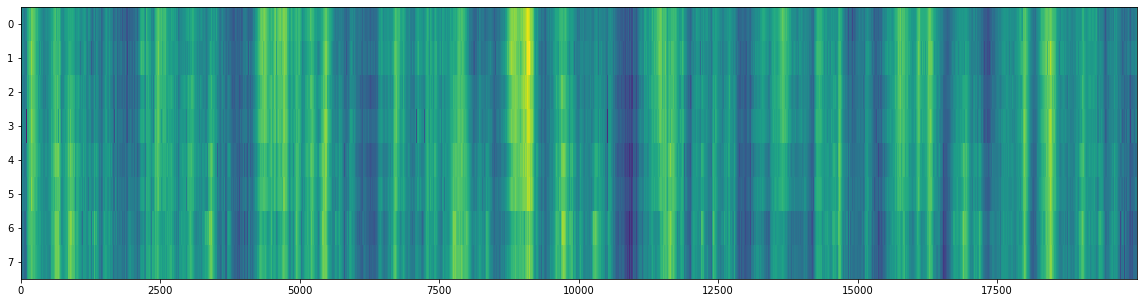

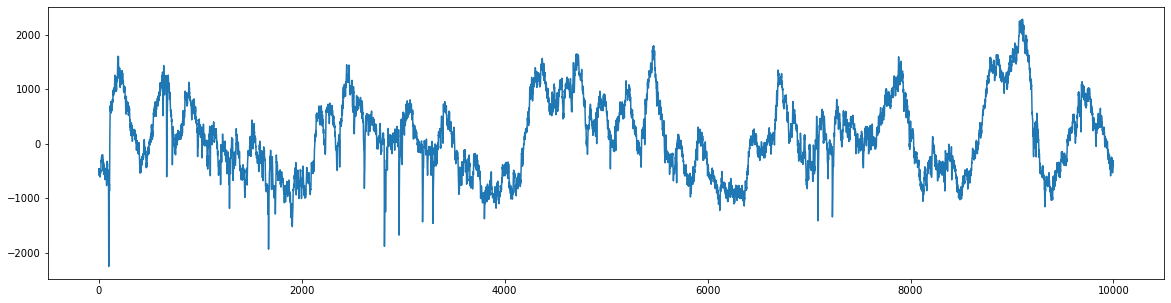

In [5]:
plt.figure(figsize=(20,5))
plt.imshow(dat,aspect="auto",interpolation="None")
plt.show()
plt.figure(figsize=(20,5))
plt.plot(dat[3,0:10000])

In [6]:
fn="/home/kevin/Downloads/shortRaw.npy"
np.save(fn,dat)

## Make a figure for lecture 1

In [7]:
fn = "/home/kevin/Downloads/shortRaw.npy"
dat = np.load(fn)

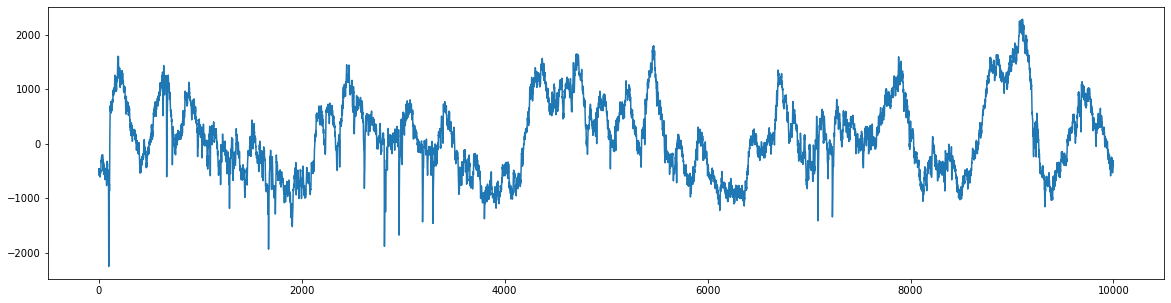

In [8]:
plt.figure(figsize=(20,5))
plt.plot(dat[3,0:10000])
plt.savefig("/home/kevin/repo/dataNeuroMaster/images/shortRaw.png")

Get a longer strech of data for spike clustering

In [13]:
dat = dfr.get_data_one_block(20000,int(20000+ses.sampling_rate*60),channels=channels)
dat.shape

(8, 1200000)

In [14]:
fn = "/home/kevin/Downloads/longRaw.npy"
np.save(fn,dat)
dat = np.load(fn)

# Animal path for modeling a speed cell

In [1]:
from spikeA.Session import Kilosort_session
from spikeA.Session import Tetrode_session
from spikeA.Animal_pose import Animal_pose
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Dat_file_reader import Dat_file_reader

In [2]:
name="mn9686-28102021-0107"
path="/adata/projects/autopi_ca1/mn9686/mn9686-28102021-0107"
ses = Kilosort_session(name,path)
ses.load_parameters_from_files()
stl = Spike_train_loader()
ses.stl= stl
stl.load_spike_train_kilosort(ses)
ses.cg = Cell_group(stl)
ap = Animal_pose(ses)
ap.load_pose_from_file()
ses.ap = ap

In [3]:
print(ses.trial_intervals.inter)

[[    0.       1811.44795]
 [ 1811.448    2724.37195]
 [ 2724.372    3936.88795]
 [ 3936.888    5749.73995]
 [ 5749.74     7562.12395]
 [ 7562.124    9342.39595]
 [ 9342.396   10554.98395]]


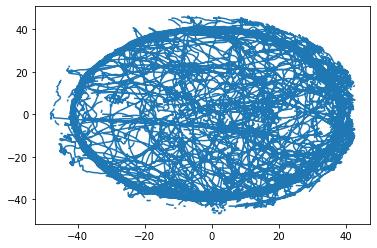

(90573, 3)


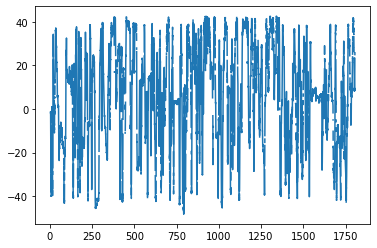

In [8]:
ap.set_intervals(np.array([[0,ses.trial_intervals.inter[0,1]]]))
myData = ap.pose[:,0:3]
plt.plot(myData[:,1],myData[:,2])
plt.show()
plt.plot(myData[:,0],myData[:,1])
print(myData.shape)

Shorten the data to 10 minutes.

In [11]:
myShortData = myData[myData[:,0]<600,:]
print(myShortData.shape)

(30000, 3)


Remove artifacts

(array([2.7107e+04, 9.0000e+01, 7.2000e+01, 2.5000e+01, 1.5000e+01,
        7.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.        ,  1.23650189,  2.47300378,  3.70950567,  4.94600756,
         6.18250945,  7.41901134,  8.65551323,  9.89201513, 11.12851702,
        12.36501891, 13.6015208 , 14.83802269, 16.07452458, 17.31102647,
        18.54752836, 19.78403025, 21.02053214, 22.25703403, 23.49353592,
        24.73003781]),
 <BarContainer object of 20 artists>)

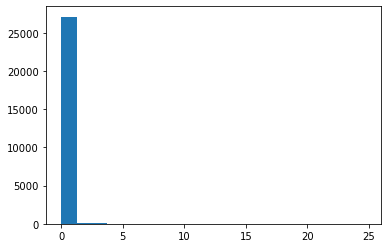

In [15]:
x = myShortData[:,1]
y = myShortData[:,2]
dx = np.diff(x,append=np.nan)
dy = np.diff(y,append=np.nan)
d = np.sqrt(dx**2+dy**2)

myShortData[d<2.5,:] = np.nan

x = myCleanData[:,1]
y = myCleanData[:,2]
dx = np.diff(x,append=np.nan)
dy = np.diff(y,append=np.nan)
d = np.sqrt(dx**2+dy**2)
plt.hist(d,bins=20)


In [20]:
fn="/home/kevin/Downloads/animal_path.npy"
print("savi)
np.save(fn,myData)

## Simulated head-direction cell

saving in /home/kevin/repo/dataNeuroMaster/data/hd_cell.npy


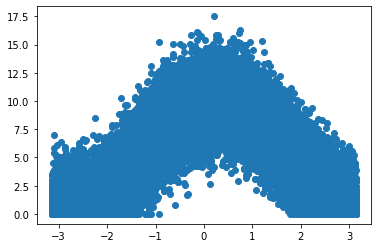

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fn="../data/animal_path.npy"

path = np.load(fn)

time = path[:,0]
x = path[:,1]
y = path[:,2]
xd = np.diff(x,append=np.nan)
yd = np.diff(y,append=np.nan)
heading = np.arctan2(yd,xd)

heading = heading[~np.isnan(heading)]


# model parameters
preferedHeading = 0.25
gain = 10

# rate
fr = (gain*(np.cos(heading-preferedHeading)+1)/2 + np.random.normal(loc=0.0, scale=2, size = heading.shape[0])).clip(min=0)

hd_cell = np.concatenate([np.expand_dims(heading,axis=1),np.expand_dims(fr,axis=1)],axis=1)
fn="/home/kevin/repo/dataNeuroMaster/data/hd_cell.npy"
print("saving in",fn)
np.save(fn,hd_cell)

plt.scatter(hd_cell[:,0],hd_cell[:,1])
plt.show()


## Spike train and position data from grid cell recordings

We want spike-trains of a couple of neurons and the position data. This will be used to characterize the neurons during the lecture.

We will get the firing rate maps of neurons during the first trial

In [33]:
from spikeA.Session import Kilosort_session
from spikeA.Session import Tetrode_session
from spikeA.Animal_pose import Animal_pose
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Dat_file_reader import Dat_file_reader
import numpy as np
import matplotlib.pyplot as plt

In [23]:
name="bt1009-27102021-0105"
path="/adata/electro/bt1009/bt1009-27102021-0105"
ses = Kilosort_session(name,path)
ses.load_parameters_from_files()
stl = Spike_train_loader()
ses.stl= stl
stl.load_spike_train_kilosort(ses)
ses.cg = Cell_group(stl)
ap = Animal_pose(ses)
ap.load_pose_from_file()
ses.ap = ap
for n in ses.cg.neuron_list:
    n.set_spatial_properties(ap)

To select interesting neurons, we will get the firing rate maps.

In [41]:
inter = np.expand_dims(ses.trial_intervals.inter[0,:],axis=0)
ses.ap.set_intervals(inter)
    
for n in ses.cg.neuron_list:
    n.spike_train.set_intervals(inter)
    n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 3, smoothing=True)
    
mapList = [ n.spatial_properties.firing_rate_map for n in ses.cg.neuron_list ]
mapStack = np.stack(mapList, axis=0)

In [42]:
mapStack.shape

(63, 38, 38)

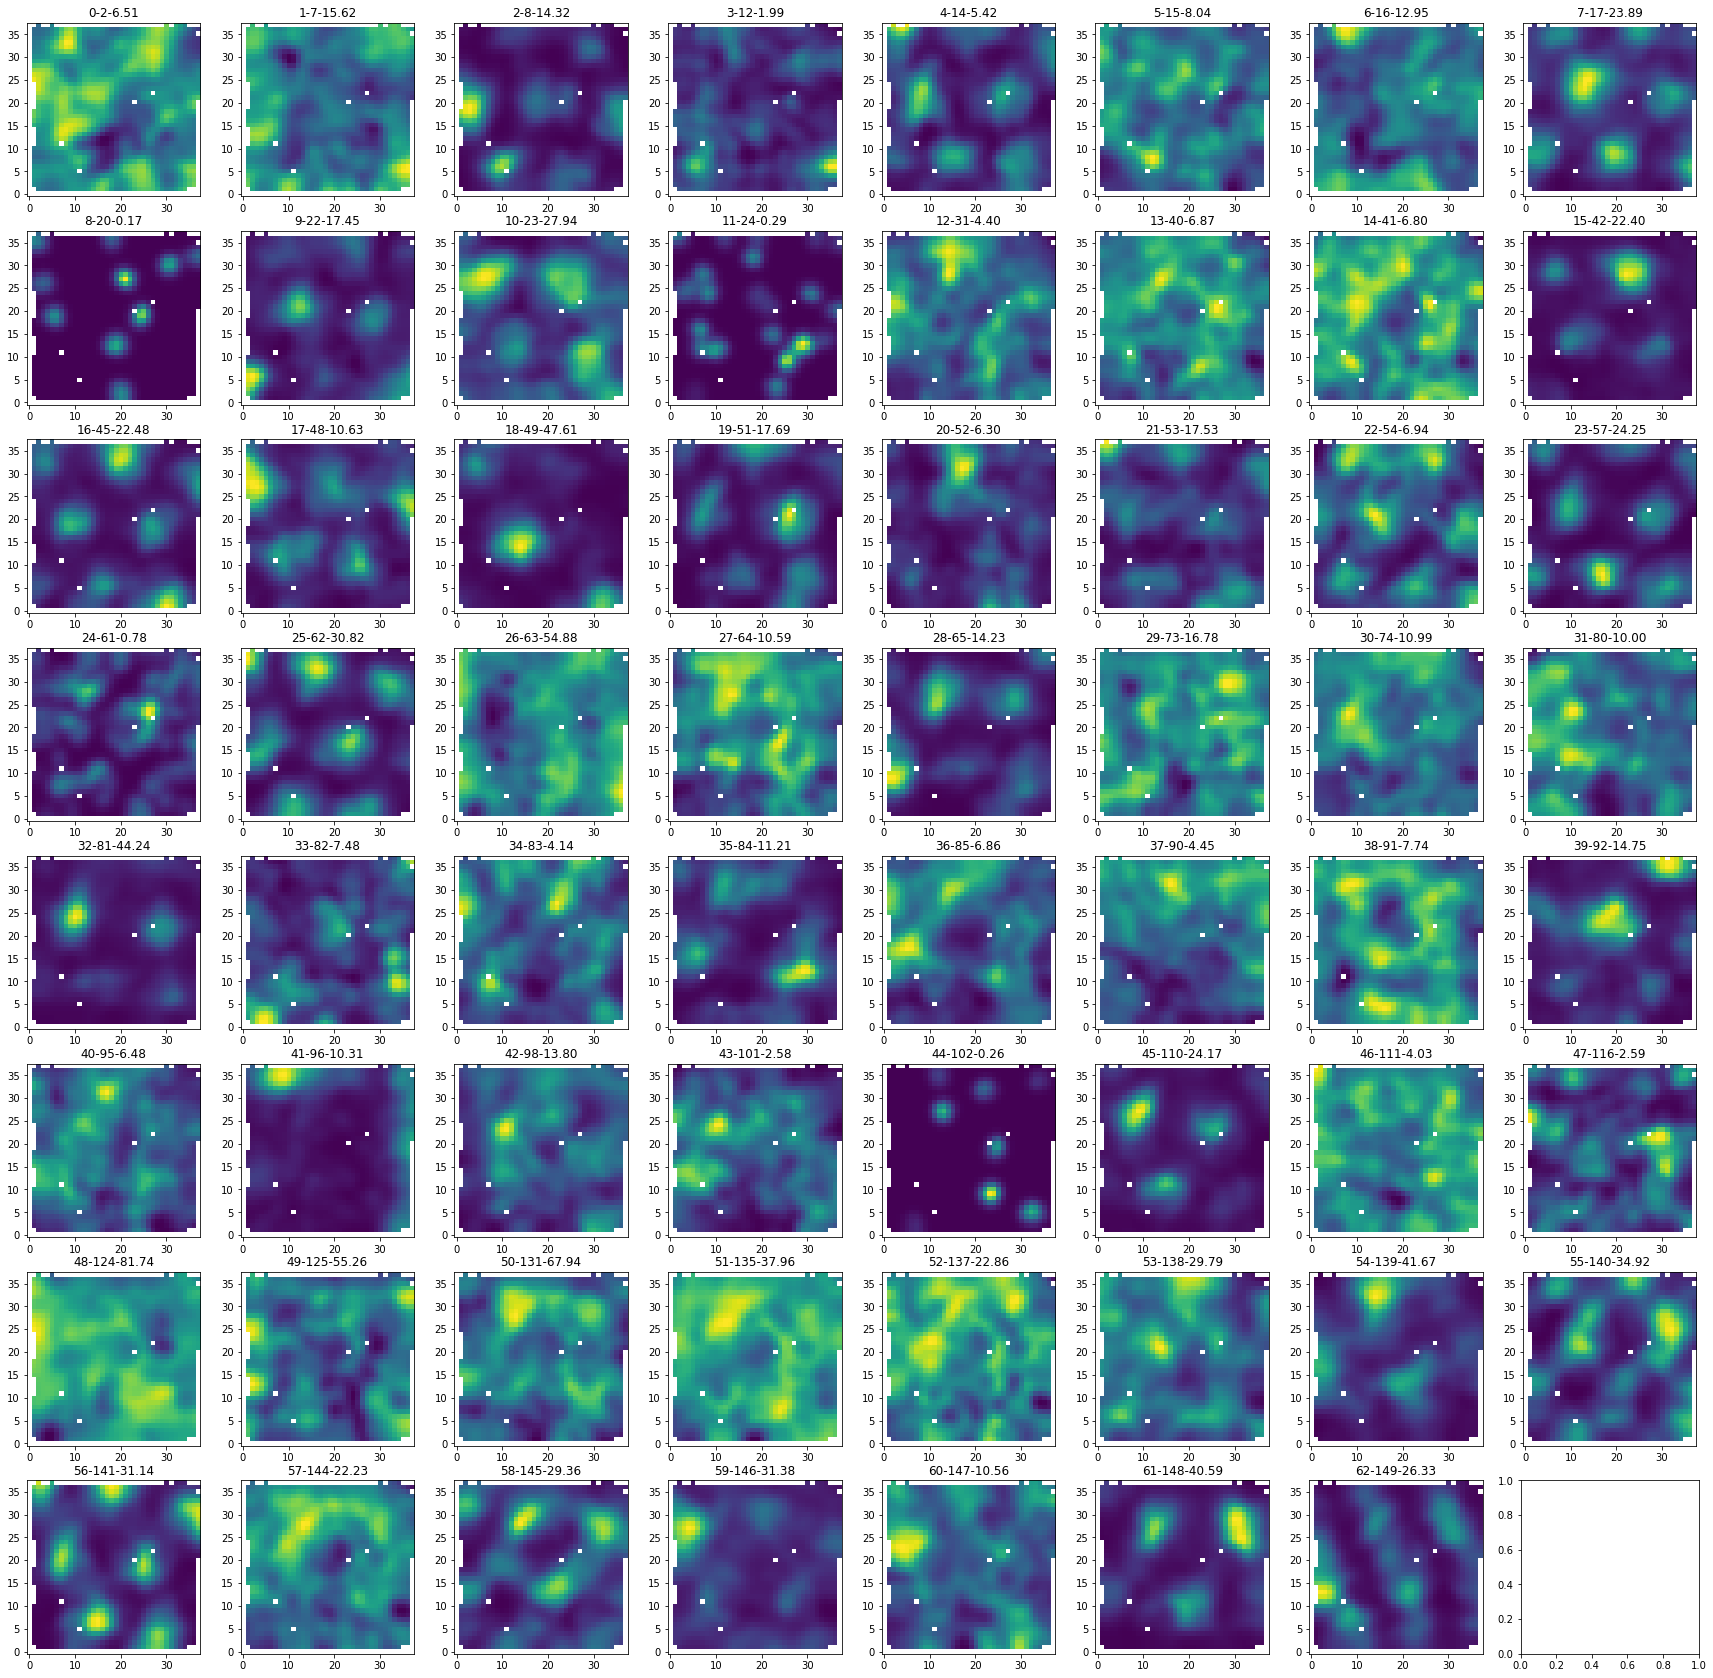

In [65]:
fig,ax = plt.subplots(8,8,figsize=(30,30))

for i,n in enumerate(ses.cg.neuron_list):
    y = int(i%8)
    x = int(i/8)
    ax[x,y].imshow(mapStack[i].T,origin="lower")
    ax[x,y].set_title("{}-{}-{:.2f}".format(i,n.name,np.nanmax(mapStack[i])))

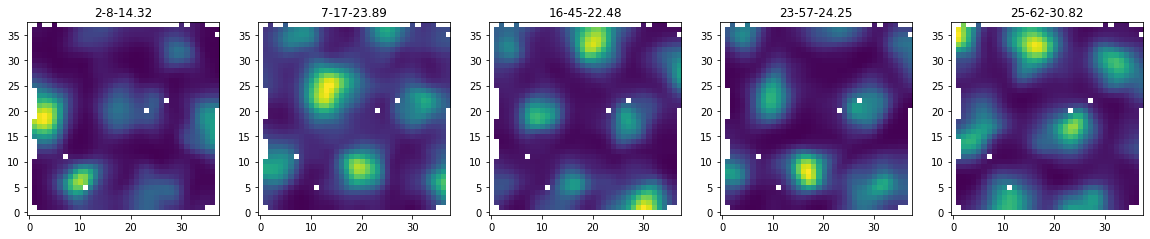

In [66]:
myList = [2,7,16,23,25]
fig,ax = plt.subplots(1,len(myList),figsize=(20,4))

for j,i in enumerate(myList):
    n = ses.cg.neuron_list[i]
    ax[j].imshow(mapStack[i].T,origin="lower")
    ax[j].set_title("{}-{}-{:.2f}".format(i,n.name,np.nanmax(mapStack[i])))

Create a list with the spike train of the selected neuron. They will only contain the data for the first trial.

In [67]:
spike_trains = []
for i in myList:
    n = ses.cg.neuron_list[i]
    spike_trains.append(n.spike_train.st)

In [68]:
spike_trains

[array([1.76150000e-01, 1.17540000e+00, 2.87110000e+00, ...,
        1.24176155e+03, 1.24297930e+03, 1.24310075e+03]),
 array([8.34000000e-02, 2.13350000e-01, 3.34850000e-01, ...,
        1.24281570e+03, 1.24290600e+03, 1.24299165e+03]),
 array([   2.0036 ,    3.85695,    4.10675, ..., 1243.3503 , 1243.3593 ,
        1243.3636 ]),
 array([7.83250000e-01, 8.52250000e-01, 8.66450000e-01, ...,
        1.23960960e+03, 1.24111530e+03, 1.24325105e+03]),
 array([4.76000000e-02, 1.71100000e-01, 3.08350000e-01, ...,
        1.24331005e+03, 1.24331295e+03, 1.24334460e+03])]

We need the position data.

In [69]:
position = {}
position["time"] = ses.ap.pose[:,0]
position["x"]= ses.ap.pose[:,1]
position["y"]= ses.ap.pose[:,2]

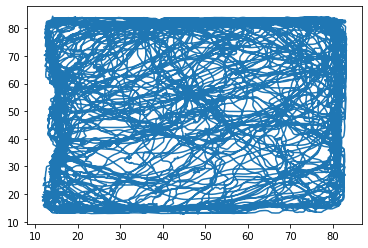

In [70]:
plt.plot(position["x"],position["y"])

In [71]:
dataSet = {"spike_trains":spike_trains,
          "position": position}

In [72]:
import pickle

In [ ]:
with open('/home/kevin/repo/dataNeuroMaster/data/kle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Head direction cells

In [1]:
from spikeA.Session import Kilosort_session
from spikeA.Session import Tetrode_session
from spikeA.Animal_pose import Animal_pose
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Dat_file_reader import Dat_file_reader
import numpy as np
import matplotlib.pyplot as plt

In [3]:
name="pk1331-29112021-0101"
path="/adata/electro/pk1331/pk1331-29112021-0101"
ses = Kilosort_session(name,path)
ses.load_parameters_from_files()
stl = Spike_train_loader()
ses.stl= stl
stl.load_spike_train_kilosort(ses)
ses.cg = Cell_group(stl)
ap = Animal_pose(ses)
ap.load_pose_from_file()
ses.ap = ap
for n in ses.cg.neuron_list:
    n.set_spatial_properties(ap)

To select interesting neurons, we will get the firing rate maps.

In [9]:
inter = np.expand_dims(ses.trial_intervals.inter[0,:],axis=0)
ses.ap.set_intervals(inter)
    
for n in ses.cg.neuron_list:
    n.spike_train.set_intervals(inter)
    n.spatial_properties.firing_rate_head_direction_histogram()
    
mapList = [ n.spatial_properties.firing_rate_head_direction_histo for n in ses.cg.neuron_list ]
mapStack = np.stack(mapList, axis=0)

In [10]:
mapStack.shape

(13, 36)

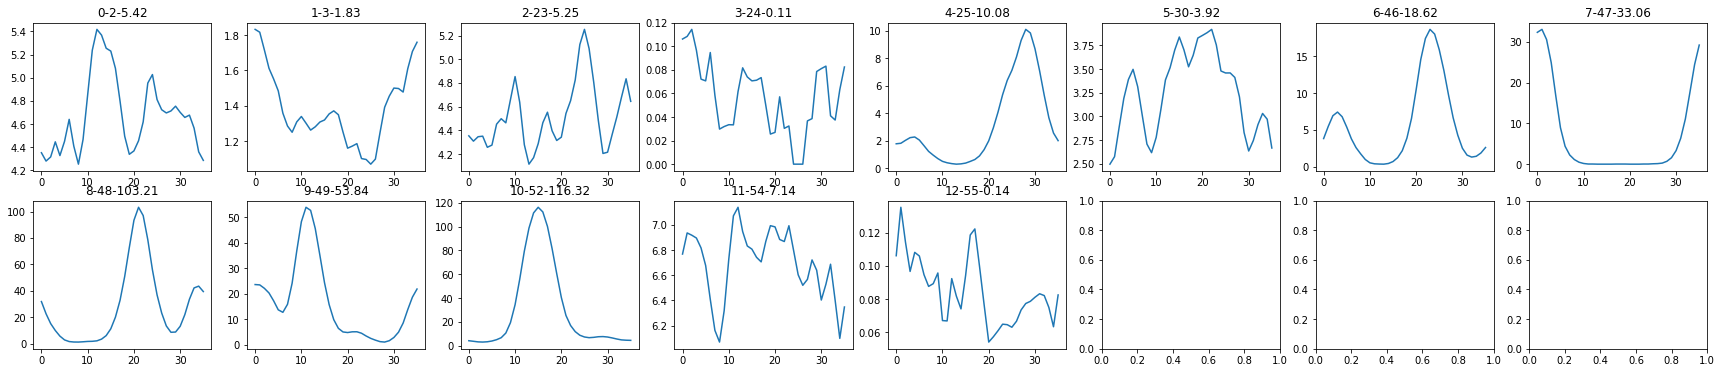

In [11]:
fig,ax = plt.subplots(2,8,figsize=(30,6))

for i,n in enumerate(ses.cg.neuron_list):
    y = int(i%8)
    x = int(i/8)
    ax[x,y].plot(mapStack[i])
    ax[x,y].set_title("{}-{}-{:.2f}".format(i,n.name,np.nanmax(mapStack[i])))

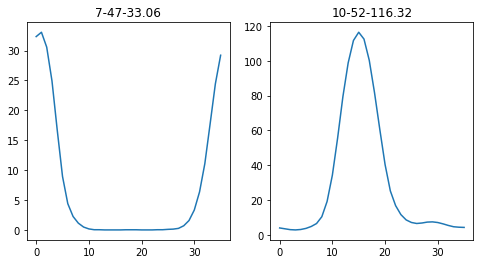

In [12]:
myList = [7,10]
fig,ax = plt.subplots(1,len(myList),figsize=(8,4))

for j,i in enumerate(myList):
    n = ses.cg.neuron_list[i]
    ax[j].plot(mapStack[i])
    ax[j].set_title("{}-{}-{:.2f}".format(i,n.name,np.nanmax(mapStack[i])))

Create a list with the spike train of the selected neuron. They will only contain the data for the first trial.

In [13]:
spike_trains = []
for i in myList:
    n = ses.cg.neuron_list[i]
    spike_trains.append(n.spike_train.st)

In [14]:
spike_trains

[array([   4.4914 ,    4.7018 ,    4.84285, ..., 1217.7297 , 1217.75575,
        1220.5681 ]),
 array([9.95000000e-03, 1.54000000e-02, 2.61000000e-02, ...,
        1.22970605e+03, 1.22997535e+03, 1.23105420e+03])]

We need the position data.

In [15]:
position = {}
position["time"] = ses.ap.pose[:,0]
position["x"]= ses.ap.pose[:,1]
position["y"]= ses.ap.pose[:,2]
position["headDirection"] = ses.ap.pose[:,4]

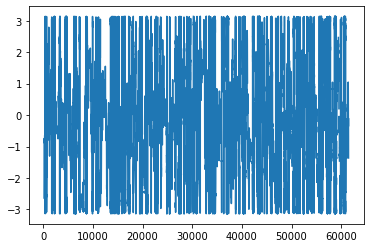

In [16]:
plt.plot(position["headDirection"])

In [17]:
dataSet = {"spike_trains":spike_trains,
          "position": position}

In [19]:
import pickle

In [21]:
with open('/home/kevin/repo/dataNeuroMaster/data/headDirectionCellData.pickle', 'wb') as handle:
    pickle.dump(dataSet, handle)